# Descriptive Statistics 

Dataset: Hoa Phat Group Joint Stock Company

### Step 1. Import modules

In [27]:
import numpy as np
import pandas as pd
import math
import statistics as st
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

### Step 2. Read the dataset

In [28]:
df = pd.read_csv('NKG Historical Data.csv',delimiter=",", thousands=',')
df


,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,24400.0,24500.0,24700.0,24300.0,4.89M,0.21%
1,05/30/2024,24350.0,24400.0,24650.0,24150.0,6.99M,-1.62%
2,05/29/2024,24750.0,25250.0,25600.0,24750.0,8.00M,-1.20%
3,05/28/2024,25050.0,25250.0,25250.0,24850.0,4.43M,0.60%
4,05/27/2024,24900.0,24600.0,24900.0,24600.0,4.31M,0.40%
...,...,...,...,...,...,...,...
1308,03/07/2019,4934.5,5217.0,5217.0,4934.5,1.29M,-3.59%
1309,03/06/2019,5118.5,5223.6,5256.5,5118.5,697.98K,-2.01%
1310,03/05/2019,5223.6,5328.7,5387.9,5223.6,2.48M,0.00%
1311,03/04/2019,5223.6,5256.5,5289.3,5125.1,1.92M,3.25%


### Step 3. Data Preprocessing

In [29]:
# Convert the data types
df['Date'] = pd.to_datetime(df['Date'])


In [30]:
# Data size
df.shape

(1313, 7)

In [31]:
# Determine the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1313 non-null   datetime64[ns]
 1   Price     1313 non-null   float64       
 2   Open      1313 non-null   float64       
 3   High      1313 non-null   float64       
 4   Low       1313 non-null   float64       
 5   Vol.      1313 non-null   object        
 6   Change %  1313 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 71.9+ KB


### Step 4. Descriptive Statistics

In [32]:
# Describe the dataset
df.describe()

,Date,Price,Open,High,Low
count,1313,1313.000000,1313.000000,1313.000000,1313.000000
mean,2021-10-12 16:33:37.974105088,15977.183473,15982.879284,16318.771287,15657.581645
min,2019-03-01 00:00:00,2891.100000,2877.900000,3088.200000,2877.900000
25%,2020-06-23 00:00:00,5118.500000,5105.300000,5217.000000,5059.300000
50%,2021-10-12 00:00:00,15700.000000,15800.000000,16100.000000,15350.000000
75%,2023-02-07 00:00:00,23000.000000,23100.000000,23500.000000,22600.000000
max,2024-05-31 00:00:00,44965.800000,45046.300000,45448.500000,44241.900000
std,NaN,10365.719745,10379.825376,10593.646012,10154.918224


In [33]:
# Describe the 'Price' attribute
df['Price'].describe()

count     1313.000000
mean     15977.183473
std      10365.719745
min       2891.100000
25%       5118.500000
50%      15700.000000
75%      23000.000000
max      44965.800000
Name: Price, dtype: float64

In [34]:
# Mode
mode = st.mode(df['Price'])
print("Mode: ", mode)

# Variance
var = st.variance(df['Price'])
print("Variance: ", var)

# Median
median = st.median(df['Price'])
print("Median: ", median)

# Coefficient of Deviation
cv = st.stdev(df['Price']) / st.mean(df['Price'])
print("Coefficient of Deviation: ", cv)

# Skewness
skew = skew(df['Price'])
print("Skewness: ", skew)

# Kurtosis
kurtosis = kurtosis(df['Price'])
print("Kurtosis: ", kurtosis)

# Range
range = max(df['Price']) - min(df['Price'])
print("Range: ", range)

Mode:  4008.1
Variance:  107448145.82473427
Median:  15700.0
Coefficient of Deviation:  0.6487826694984461
Skewness:  0.5408916253881425
Kurtosis:  -0.4843842135195673
Range:  42074.700000000004


### Step 5. Visualization

In [35]:
# Get data
df1 = pd.DataFrame(df, columns=['Date', 'Price'])

# Set 'Date' column as index for comparison plotting
df1.index = df1.Date
df1.drop('Date', axis=1, inplace=True)
df1 = df1.asfreq('D')
df1['Price'] = df1['Price'].ffill()

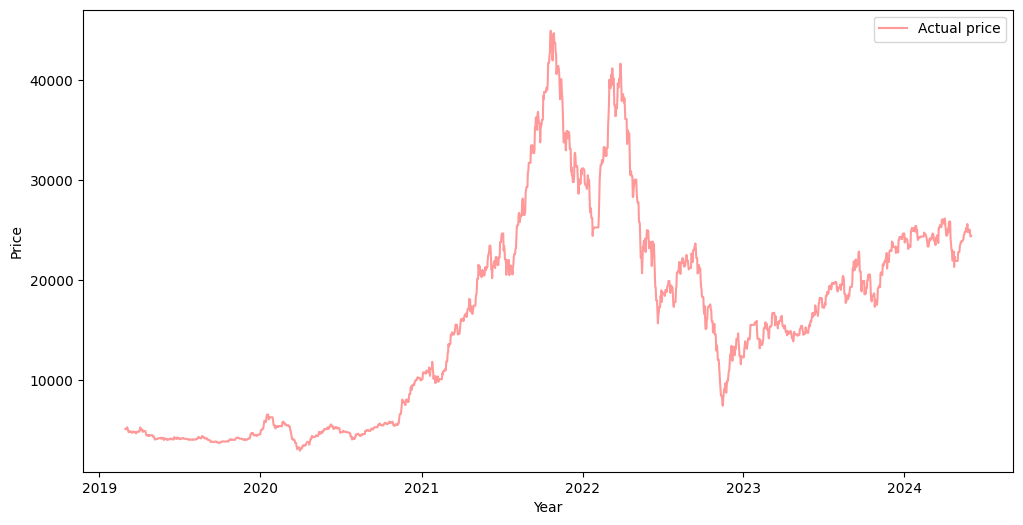

In [36]:
# Plot Price
plt.figure(figsize=(12, 6))
plt.plot(df1['Price'], label='Actual price', color='#FF9999')

# plt.title('HPG stock market')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Boxplot of HPG')

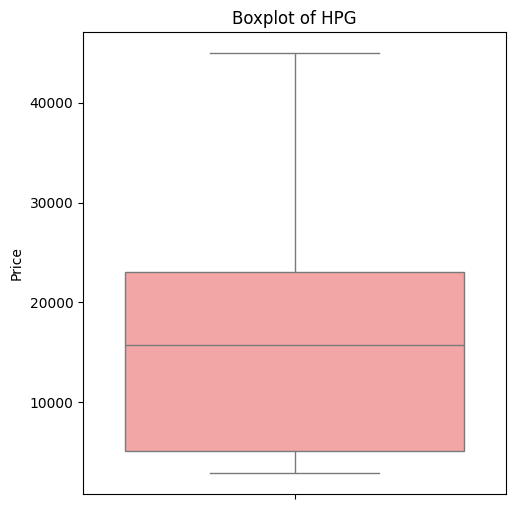

In [41]:
# Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(df1['Price'], color='#FF9999', fliersize=5)
plt.title('Boxplot of HPG')

Text(0, 0.5, 'Frequency')

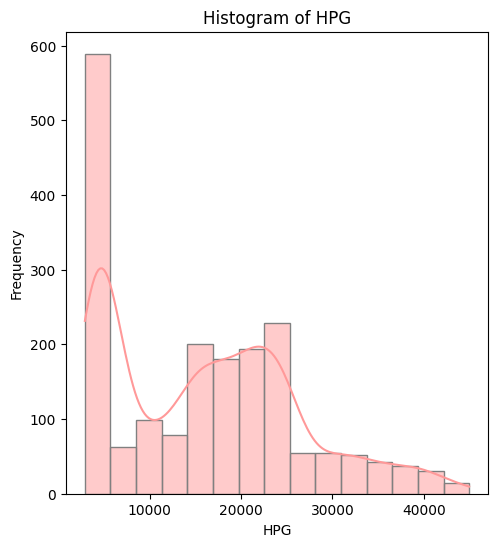

In [40]:
    # Histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    sns.histplot(df1['Price'], bins=15, kde=True, color='#FF9999', edgecolor='grey')
    plt.title('Histogram of HPG')
    plt.xlabel('HPG')
    plt.ylabel('Frequency')

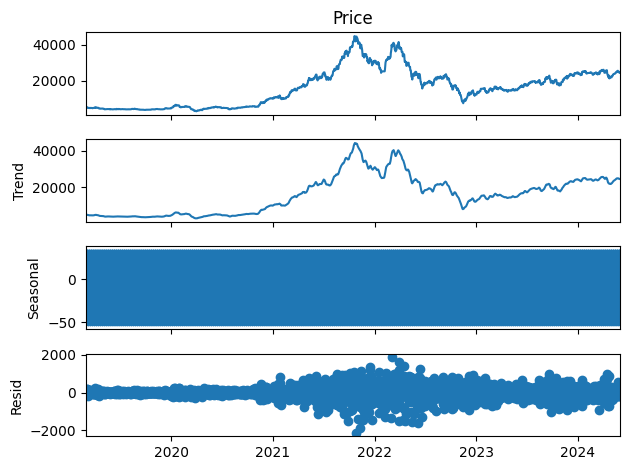

In [42]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df1['Price'], model='additive')
fig = decomposition.plot()
plt.show()